# Lead_Scoring_Case_Study

In [2]:
#Importing / Loading the Data
#Data cleaning and preparation : Segmentation
#Preprocessing steps : EDA 
#Data encoding :Converting categorical variables to dummy variables
#Model Evaluation : Test-train split
#Feature scaling
#Model Building using RFE, p-values and VIFs

In [3]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks
import seaborn as sns
%matplotlib inline


from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import precision_score, recall_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve

import statsmodels.api as sm

# Importing / Loading the Data

In [4]:
ldf = pd.read_csv('Leads.csv')
ldf.head() 

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
ldf.shape

(9240, 37)

In [6]:
ldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
ldf.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Data cleaning and preparation

In [8]:
# a.Drop ID columns - Prospect id
# b.Null Check and Handling : Removing columns with null percent more than 45%
# c.Null Check and Handling : Imputing null values
# d.Duplicate Values : Last Notable Activity and Last Activity 
# e.Outliers : Handling Outliers


In [9]:
#Drop ID columns - Prospect id and 'Lead Number'
ldf.drop(['Prospect ID'],1,inplace=True)
ldf.drop(['Lead Number'],1,inplace=True)

In [10]:
# Null Check and Handling
null_percentage = ldf.isnull().sum()/ldf.shape[0]*100
null_percentage[(null_percentage>40)].count()

5

In [11]:
null_percentage[(null_percentage>40)]

Lead Quality                   51.590909
Asymmetrique Activity Index    45.649351
Asymmetrique Profile Index     45.649351
Asymmetrique Activity Score    45.649351
Asymmetrique Profile Score     45.649351
dtype: float64

In [12]:
# The details of columns with more than 45% of null values.
# Lead Quality                   51.590909  -- Indicates the quality of lead based on the data and intuition the the employee who has been assigned to the lead.
# Asymmetrique Activity Index    45.649351  -- An index and score assigned to each customer based on their activity and their profile
# Asymmetrique Profile Index     45.649351  -- An index and score assigned to each customer based on their activity and their profile
# Asymmetrique Activity Score    45.649351  -- An index and score assigned to each customer based on their activity and their profile
# Asymmetrique Profile Score     45.649351  -- An index and score assigned to each customer based on their activity and their profile

In [13]:
# Removing columns whch column containd more than 45% of Missing Values
delcolms = null_percentage[(null_percentage>40)]
coltodelete = delcolms.keys()
ldf.drop(coltodelete,axis=1,inplace=True)

In [14]:
ldf.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [15]:
null_percentage = ldf.isnull().sum()/ldf.shape[0]*100
null_percentage[(null_percentage>0)]

Lead Source                                       0.389610
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Tags                                             36.287879
Lead Profile                                     29.318182
City                                             15.367965
dtype: float64

In [16]:
# Tags has 36% of null values and as per description it is assigned to customers by company indicating the current status of the lead.

ldf.drop('Tags',1,inplace=True)

In [17]:
# For column 'What matters most to you in choosing a course' has 99% same value this column can be dropped

ldf['What matters most to you in choosing a course'].value_counts('normalize=True')

Better Career Prospects      0.999541
Flexibility & Convenience    0.000306
Other                        0.000153
Name: What matters most to you in choosing a course, dtype: float64

In [18]:
ldf.drop('What matters most to you in choosing a course',1,inplace=True)

In [19]:
# for column 'What is your current occupation' since most data value is Unemployed,hence replacing NaN with Unemployed

ldf['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [20]:
ldf['What is your current occupation']=ldf['What is your current occupation'].replace(np.nan,'Unemployed')

In [21]:
ldf['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [22]:
# for column 'Last Activity' since most data value is 'Email Opened',hence replacing NaN with 'Email Opened'

ldf['Last Activity']=ldf['Last Activity'].replace(np.nan,'Email Opened')

In [23]:
ldf['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [24]:
# for column 'Lead Source' since most data value is 'Google',hence replacing NaN with 'Google' 

ldf['Lead Source']=ldf['Lead Source'].replace(np.nan,'Google')

In [25]:
ldf['Lead Source']=ldf['Lead Source'].replace('google','Google')

In [26]:
# changing categories which are occured less than 1000
col_dict_ls=dict(ldf['Lead Source'].value_counts()<1000)

# labels which are occured less like Reference,Reffereal site we can impute to 'Other'
for i in col_dict_ls.keys():
    if col_dict_ls[i]==True:
        ldf['Lead Source']=ldf['Lead Source'].replace(i,'Other')

In [27]:
ldf['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [28]:
# for column 'Country' since city is 'Unknown' for null ,hence replacing NaN with 'Unknown'

ldf['Country']=ldf['Country'].replace(np.nan,'Unknown')

In [29]:
# changing categories which are occured less than 1000
col_dict_ls=dict(ldf['Country'].value_counts()<1000)

# labels which are occured less like Reference,Reffereal site we can impute to 'Other'
for i in col_dict_ls.keys():
    if col_dict_ls[i]==True:
        ldf['Country']=ldf['Country'].replace(i,'Other')

In [30]:
ldf['Specialization'].value_counts(dropna=False)

Select                               1942
NaN                                  1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [31]:
# for column 'Specialization' since most data value is 'Finance Management',hence replacing NaN with 'Finance Management' 
ldf = ldf.replace('Select', np.nan)
ldf['Specialization']=ldf['Specialization'].replace(np.nan,'Finance Management')

In [32]:
ldf['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [33]:
# for column 'City' since city is 'Unknown' for null ,hence replacing NaN with 'Unknown' 

ldf['City']=ldf['City'].replace(np.nan,'Unknown')

In [34]:
ldf['Lead Profile'].value_counts(dropna=False)

NaN                            6855
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [35]:
# for column 'Lead Profile' since most data value is not known ,hence replacing NaN with Unknown 
ldf['Lead Profile']=ldf['Lead Profile'].replace(np.nan,'Unknown')

In [36]:
ldf['How did you hear about X Education'].value_counts(dropna=False)

NaN                      7250
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [37]:
#Since max number of values are Nan , this column can be dropped

ldf.drop('How did you hear about X Education',1,inplace=True)

In [38]:
ldf['I agree to pay the amount through cheque'].value_counts(dropna=False)


No    9240
Name: I agree to pay the amount through cheque, dtype: int64

In [39]:
ldf['Get updates on DM Content'].value_counts(dropna=False)

No    9240
Name: Get updates on DM Content, dtype: int64

In [40]:
ldf['Update me on Supply Chain Content'].value_counts(dropna=False)

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [41]:
ldf['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [42]:
ldf['Search'].value_counts(dropna=False)

No     9226
Yes      14
Name: Search, dtype: int64

In [43]:
ldf['Magazine'].value_counts(dropna=False)

No    9240
Name: Magazine, dtype: int64

In [44]:
ldf['Newspaper Article'].value_counts(dropna=False)

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [45]:
ldf['X Education Forums'].value_counts(dropna=False)

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [46]:
ldf['Newspaper'].value_counts(dropna=False)

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [47]:
ldf['Digital Advertisement'].value_counts(dropna=False)

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [48]:
ldf['Through Recommendations'].value_counts(dropna=False)

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [49]:
ldf['Do Not Call'].value_counts(dropna=False)

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [50]:
#Since all / max values are No , all these column can be dropped
#'I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content','Receive More Updates About Our Courses'
#'Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'


ldf.drop('I agree to pay the amount through cheque',1,inplace=True)
ldf.drop('Get updates on DM Content',1,inplace=True)
ldf.drop('Update me on Supply Chain Content',1,inplace=True)
ldf.drop('Receive More Updates About Our Courses',1,inplace=True)
ldf.drop('Search',1,inplace=True)
ldf.drop('Magazine',1,inplace=True)
ldf.drop('Newspaper Article',1,inplace=True)
ldf.drop('X Education Forums',1,inplace=True)
ldf.drop('Newspaper',1,inplace=True)
ldf.drop('Digital Advertisement',1,inplace=True)
ldf.drop('Through Recommendations',1,inplace=True)
ldf.drop('Do Not Call',1,inplace=True)


In [51]:
#Last Notable Activity is same as Last Activity , hence dropping it

ldf.drop('Last Notable Activity',1,inplace=True)

In [52]:
ldf['A free copy of Mastering The Interview'].value_counts(normalize=True)

No     0.687446
Yes    0.312554
Name: A free copy of Mastering The Interview, dtype: float64

In [53]:
#Last Notable Activity is same as Last Activity , hence dropping it

ldf.drop('A free copy of Mastering The Interview',1,inplace=True)

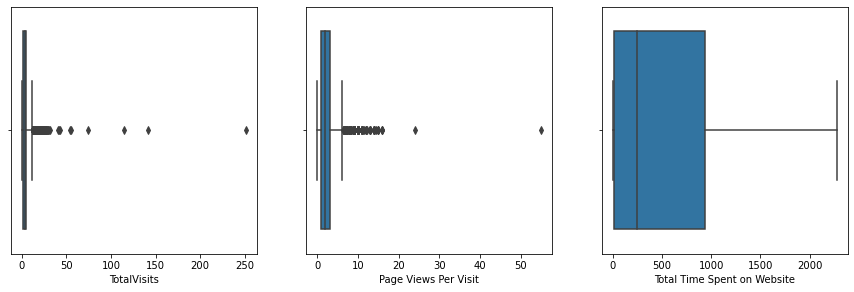

In [54]:
#Outliers : Handling Outliers
# Finding the outliers
plt.figure(figsize = (15,10))
plt.subplot(2,3,1)
sns.boxplot(ldf['TotalVisits'])
plt.subplot(2,3,2)
sns.boxplot(ldf['Page Views Per Visit'])
plt.subplot(2,3,3)
sns.boxplot(ldf['Total Time Spent on Website'])
plt.xlabel('Total Time Spent on Website')
plt.show()

In [55]:
#Outliers seen in TotalVisits and Page Views Per Visit hence imputing it with median 

ldf['TotalVisits']=ldf['TotalVisits'].fillna(ldf['TotalVisits'].median())
ldf['Page Views Per Visit']=ldf['Page Views Per Visit'].fillna(ldf['Page Views Per Visit'].median())

In [56]:
## No null values present . hence null Handling completed

null_percentage = ldf.isnull().sum()/ldf.shape[0]*100
null_percentage[(null_percentage>0)]

Series([], dtype: float64)

# SEGMENTATION

In [57]:
ldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9240 non-null   object 
 1   Lead Source                      9240 non-null   object 
 2   Do Not Email                     9240 non-null   object 
 3   Converted                        9240 non-null   int64  
 4   TotalVisits                      9240 non-null   float64
 5   Total Time Spent on Website      9240 non-null   int64  
 6   Page Views Per Visit             9240 non-null   float64
 7   Last Activity                    9240 non-null   object 
 8   Country                          9240 non-null   object 
 9   Specialization                   9240 non-null   object 
 10  What is your current occupation  9240 non-null   object 
 11  Lead Profile                     9240 non-null   object 
 12  City                

In [58]:
targetVar = 'Converted'
ldfnum=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
ldfcat=['Lead Origin','Lead Source','Do Not Email','Last Activity','Country','Specialization','What is your current occupation','Lead Profile','City']

# Understanding of Continous Variables

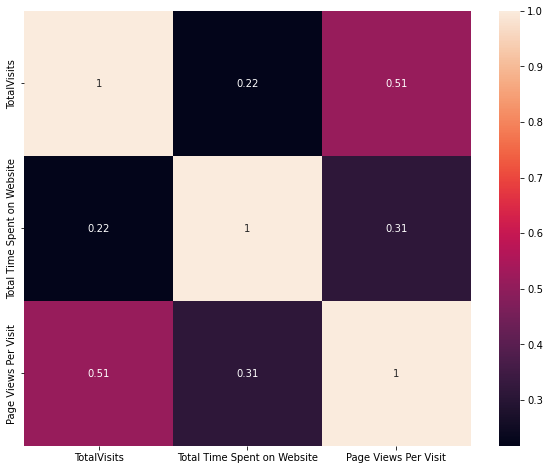

In [59]:
plt.figure(figsize=(10,8))
sns.heatmap(ldf[ldfnum].corr(),annot = True)
plt.show()

# Exploratory Data Analysis 

# Univariate Analysis

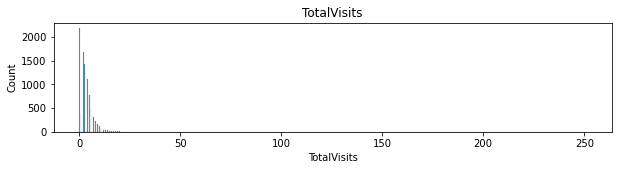

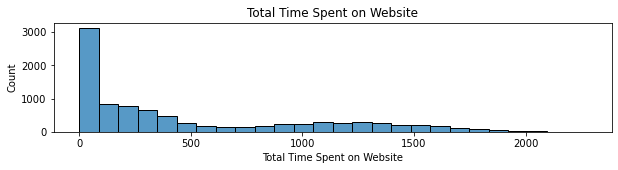

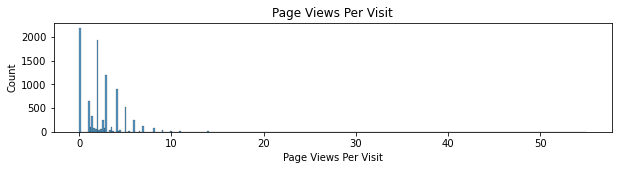

In [60]:
##UNIVARIATE ANALYSIS FOR CONTINOUS/NUMERICAL VARIABLE 

for c in ldfnum :
    plt.figure(figsize=(10,2))
    plt.title(c)
    sns.histplot(ldf[c])
    plt.show()

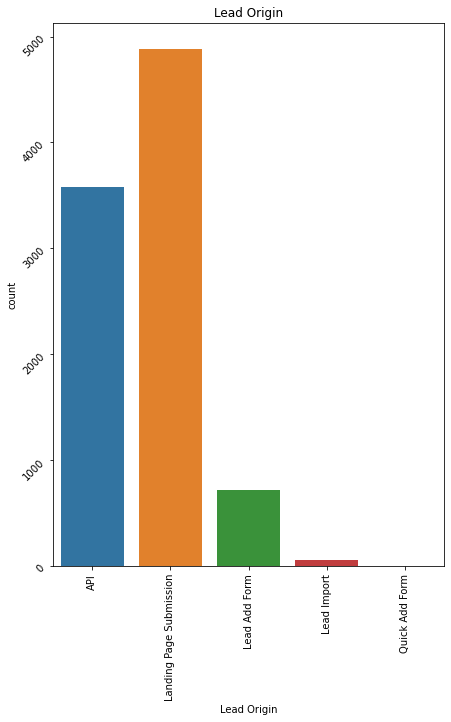

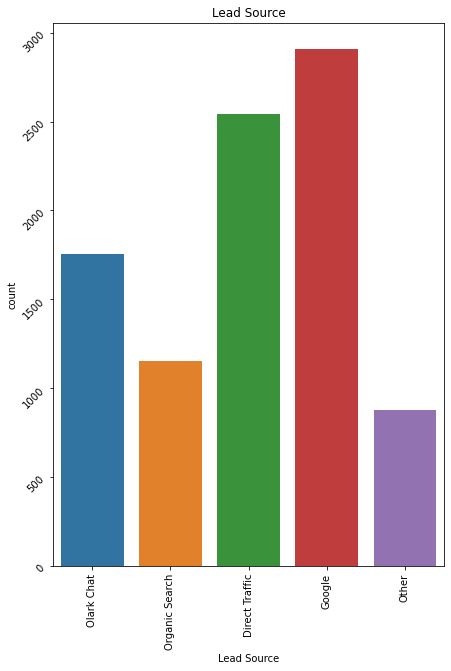

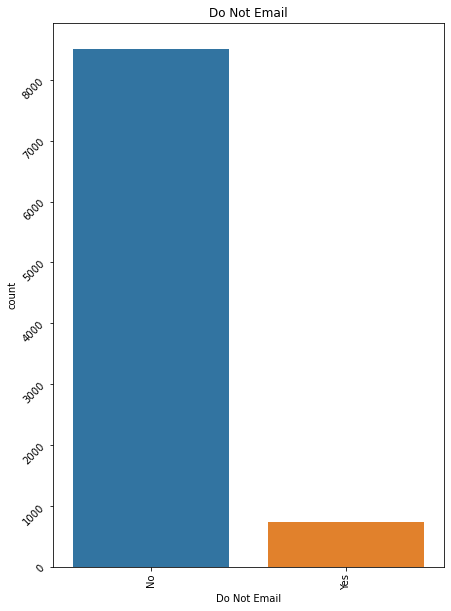

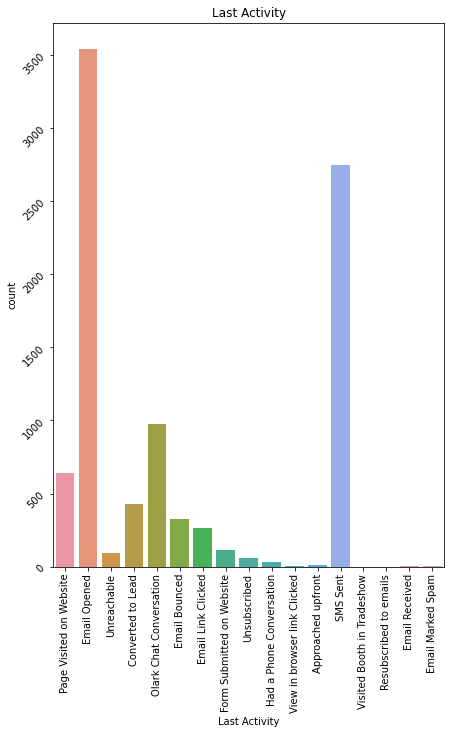

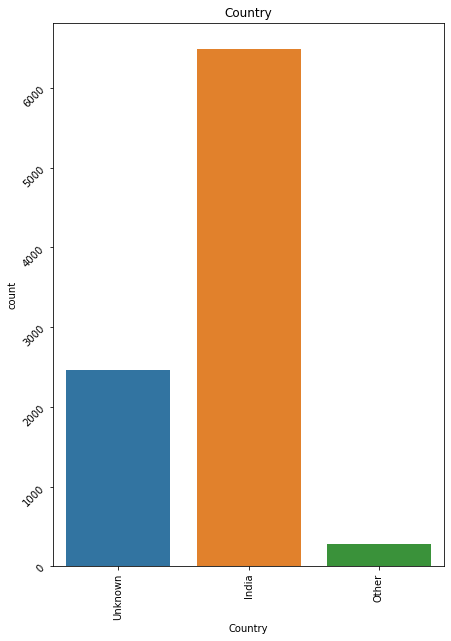

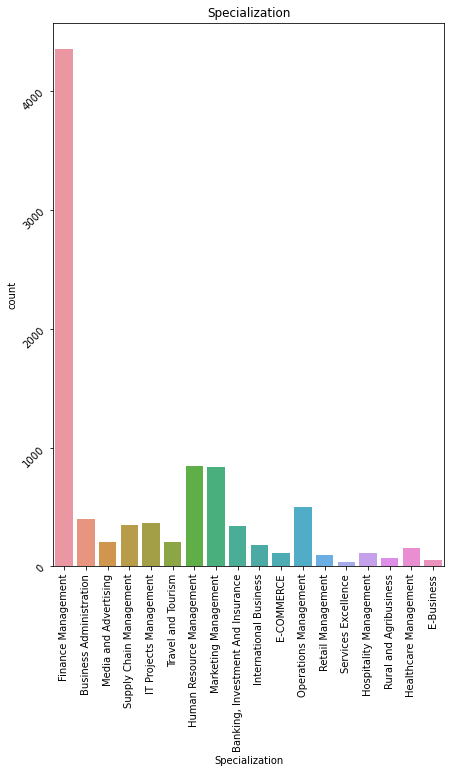

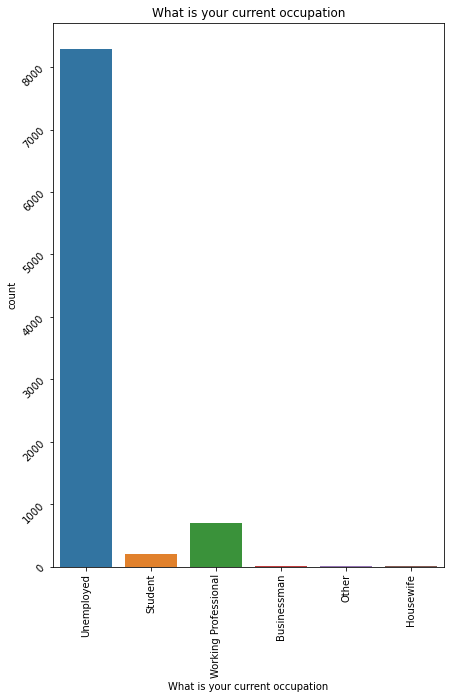

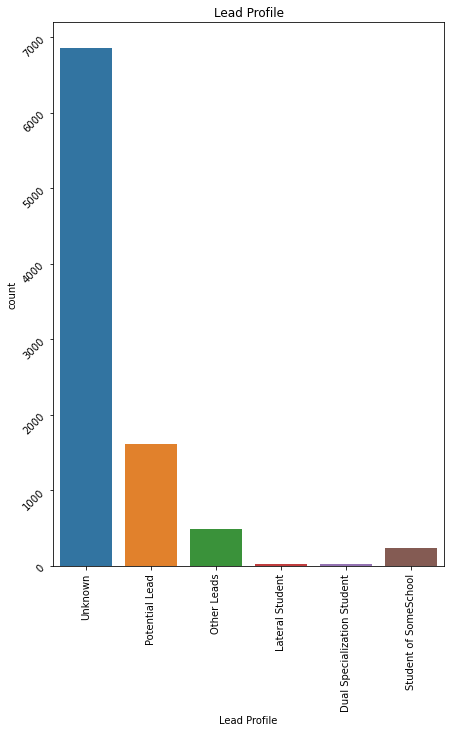

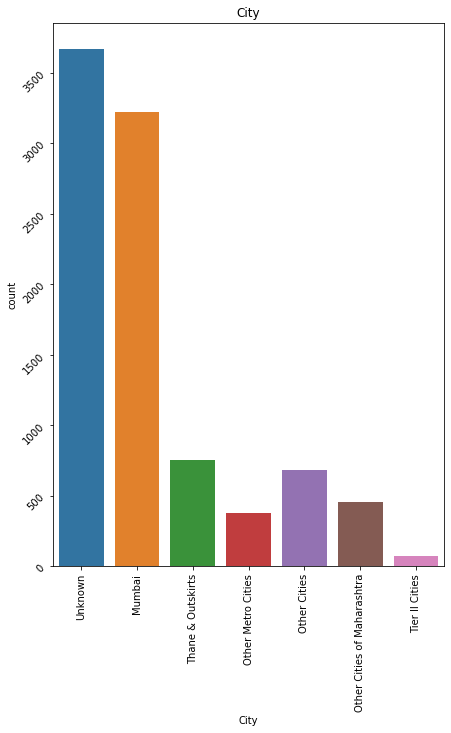

In [61]:
##UNIVARIATE ANALYSIS FOR CATEGORICAL VARIABLE 

for c in ldfcat :
    plt.figure(figsize=(7,10))
    plt.title(c)
    sns.countplot(ldf[c])
    plt.yticks(size=10,rotation=45)
    plt.xticks(size=10,rotation=90)
    plt.show()

# Bivariate Analysis

# Target Column : Converted - targetVar

# Categorical vs Categorical Variables

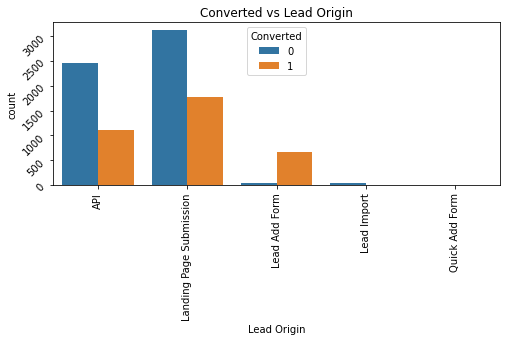

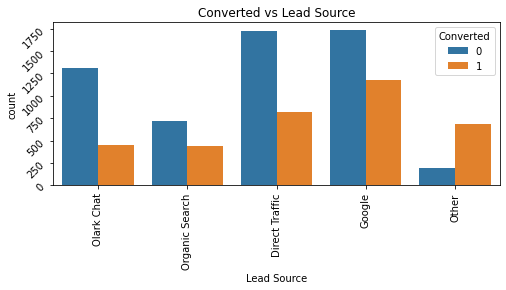

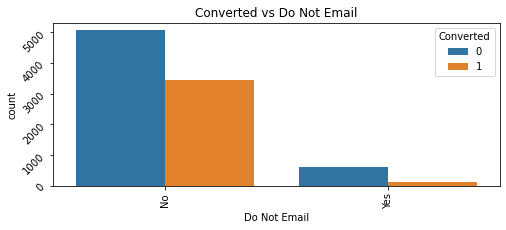

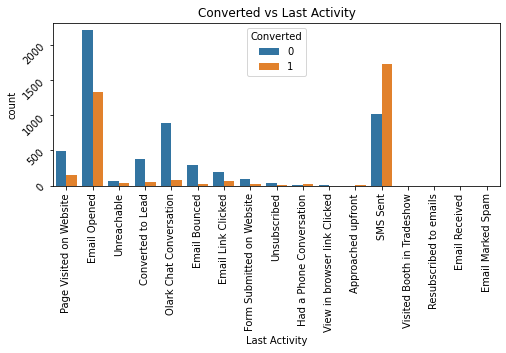

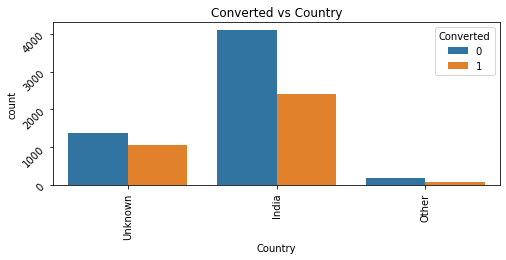

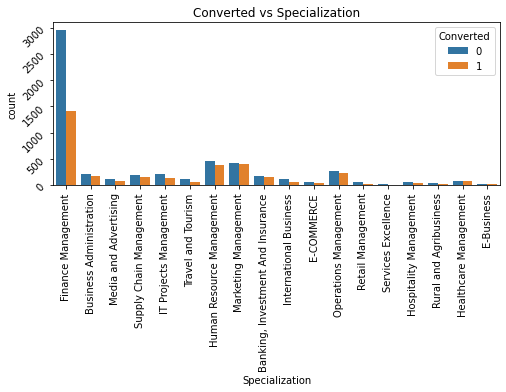

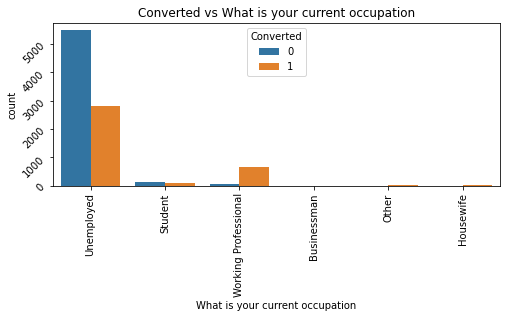

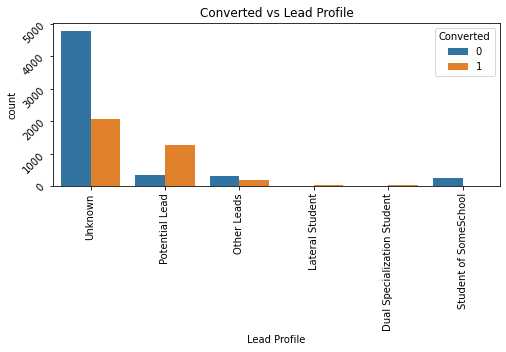

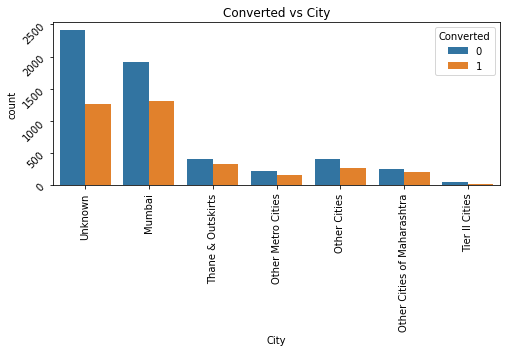

In [62]:
for c2 in ldfcat :
    plt.figure(figsize=(8,3))
    plt.yticks(size=10,rotation=45)
    plt.xticks(size=10,rotation=90)
    plt.title("Converted vs "+c2)
    sns.countplot(data=ldf,x=c2,hue=targetVar)
    plt.show()

In [63]:
#Insights :-
#- Lead Source  : Direct Traffic and Google are the two main source for Converted Leads
#- Last Activity : Email Opened and SMS Sent are the highly Converted Leads
#- Specialization : Leads who choosed Finance Management as Specialization are greater than all others
#- What is your current occupation :  Mostly Unemployed people have high chances of getting Converted 

# Numerical vs Categorical Variables

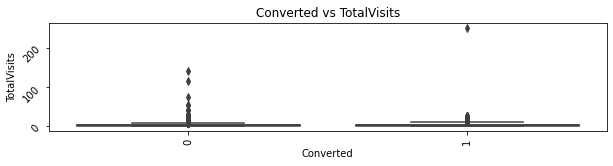

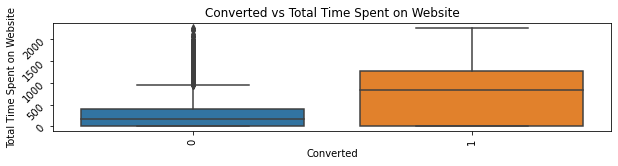

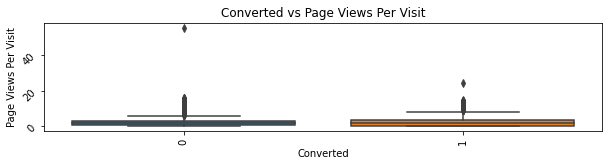

In [64]:
for c2 in ldfnum :
    plt.figure(figsize=(10,2))
    plt.yticks(size=10,rotation=45)
    plt.xticks(size=10,rotation=90)
    plt.title("Converted vs "+c2)
    sns.boxplot(ldf["Converted"],ldf[c2])
    plt.show()

# Data encoding :Converting categorical variables to dummy variables

In [65]:
ldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9240 non-null   object 
 1   Lead Source                      9240 non-null   object 
 2   Do Not Email                     9240 non-null   object 
 3   Converted                        9240 non-null   int64  
 4   TotalVisits                      9240 non-null   float64
 5   Total Time Spent on Website      9240 non-null   int64  
 6   Page Views Per Visit             9240 non-null   float64
 7   Last Activity                    9240 non-null   object 
 8   Country                          9240 non-null   object 
 9   Specialization                   9240 non-null   object 
 10  What is your current occupation  9240 non-null   object 
 11  Lead Profile                     9240 non-null   object 
 12  City                

In [66]:
ldf.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Lead Profile,City
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Unknown,Finance Management,Unemployed,Unknown,Unknown
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,India,Finance Management,Unemployed,Unknown,Unknown
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Potential Lead,Mumbai
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Unknown,Mumbai
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,India,Finance Management,Unemployed,Unknown,Mumbai


In [67]:
ldf['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [68]:
#Creating Dummies
ldf = pd.get_dummies(ldf, drop_first=True)

In [69]:
ldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 64 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             9240 non-null   int64  
 1   TotalVisits                                           9240 non-null   float64
 2   Total Time Spent on Website                           9240 non-null   int64  
 3   Page Views Per Visit                                  9240 non-null   float64
 4   Lead Origin_Landing Page Submission                   9240 non-null   uint8  
 5   Lead Origin_Lead Add Form                             9240 non-null   uint8  
 6   Lead Origin_Lead Import                               9240 non-null   uint8  
 7   Lead Origin_Quick Add Form                            9240 non-null   uint8  
 8   Lead Source_Google                                    9240

In [70]:
# removing unnecessary columns

for c1 in list(ldf):
    if c1 not in ldfnum:
        print(ldf[c1].value_counts())

0    5679
1    3561
Name: Converted, dtype: int64
1    4886
0    4354
Name: Lead Origin_Landing Page Submission, dtype: int64
0    8522
1     718
Name: Lead Origin_Lead Add Form, dtype: int64
0    9185
1      55
Name: Lead Origin_Lead Import, dtype: int64
0    9239
1       1
Name: Lead Origin_Quick Add Form, dtype: int64
0    6331
1    2909
Name: Lead Source_Google, dtype: int64
0    7485
1    1755
Name: Lead Source_Olark Chat, dtype: int64
0    8086
1    1154
Name: Lead Source_Organic Search, dtype: int64
0    8361
1     879
Name: Lead Source_Other, dtype: int64
0    8506
1     734
Name: Do Not Email_Yes, dtype: int64
0    8812
1     428
Name: Last Activity_Converted to Lead, dtype: int64
0    8914
1     326
Name: Last Activity_Email Bounced, dtype: int64
0    8973
1     267
Name: Last Activity_Email Link Clicked, dtype: int64
0    9238
1       2
Name: Last Activity_Email Marked Spam, dtype: int64
0    5700
1    3540
Name: Last Activity_Email Opened, dtype: int64
0    9238
1       2
N

In [71]:
## as per above count of all the below columns are less than 100 hence deleting them


ldf=ldf.drop(['Lead Origin_Quick Add Form','Last Activity_Email Marked Spam','Last Activity_Email Received','Last Activity_Resubscribed to emails','Last Activity_View in browser link Clicked','Last Activity_Visited Booth in Tradeshow'],1)



In [72]:
ldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 58 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             9240 non-null   int64  
 1   TotalVisits                                           9240 non-null   float64
 2   Total Time Spent on Website                           9240 non-null   int64  
 3   Page Views Per Visit                                  9240 non-null   float64
 4   Lead Origin_Landing Page Submission                   9240 non-null   uint8  
 5   Lead Origin_Lead Add Form                             9240 non-null   uint8  
 6   Lead Origin_Lead Import                               9240 non-null   uint8  
 7   Lead Source_Google                                    9240 non-null   uint8  
 8   Lead Source_Olark Chat                                9240

# Model Evaluation 

# Splitting into train and test

In [73]:
X = ldf.drop(['Converted'],axis =1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,...,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Lead Profile_Unknown,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unknown
0,0.0,0,0.0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,5.0,674,2.5,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,2.0,1532,2.0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [74]:
y= ldf['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [75]:
#Test-train split new
X_train, X_test, y_train, y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=1)




In [76]:
#Test-train split

#df_train, df_test = train_test_split(ldf,train_size=0.70,random_state=100)
#print(df_train.shape)
#print(df_test.shape)

In [77]:
#y_train = df_train.pop('Converted')

In [78]:
#y_test = df_test.pop('Converted')

In [79]:
#x_train = df_train

In [80]:
#x_test = df_test

In [81]:
#y_train.head()

In [82]:
#x_train.head()

# Rescaling for variables

In [83]:
scaler = StandardScaler()
X_train[ldfnum] = scaler.fit_transform(X_train[ldfnum])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,...,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Lead Profile_Unknown,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unknown
5261,1.266623,-0.225161,0.064019,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2901,-0.662572,-0.886868,-1.080745,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
6969,-0.276733,-0.874002,-0.164934,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1256,0.109106,-0.747174,-0.164934,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1554,-0.276733,-0.710413,-0.164934,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [84]:
# CHecking Converted Rate

conrate = (sum(ldf['Converted'])/len(ldf['Converted'].index))*100
conrate


38.53896103896104

In [85]:
# we have almost 39% converstion rate

# Looking at Correlations

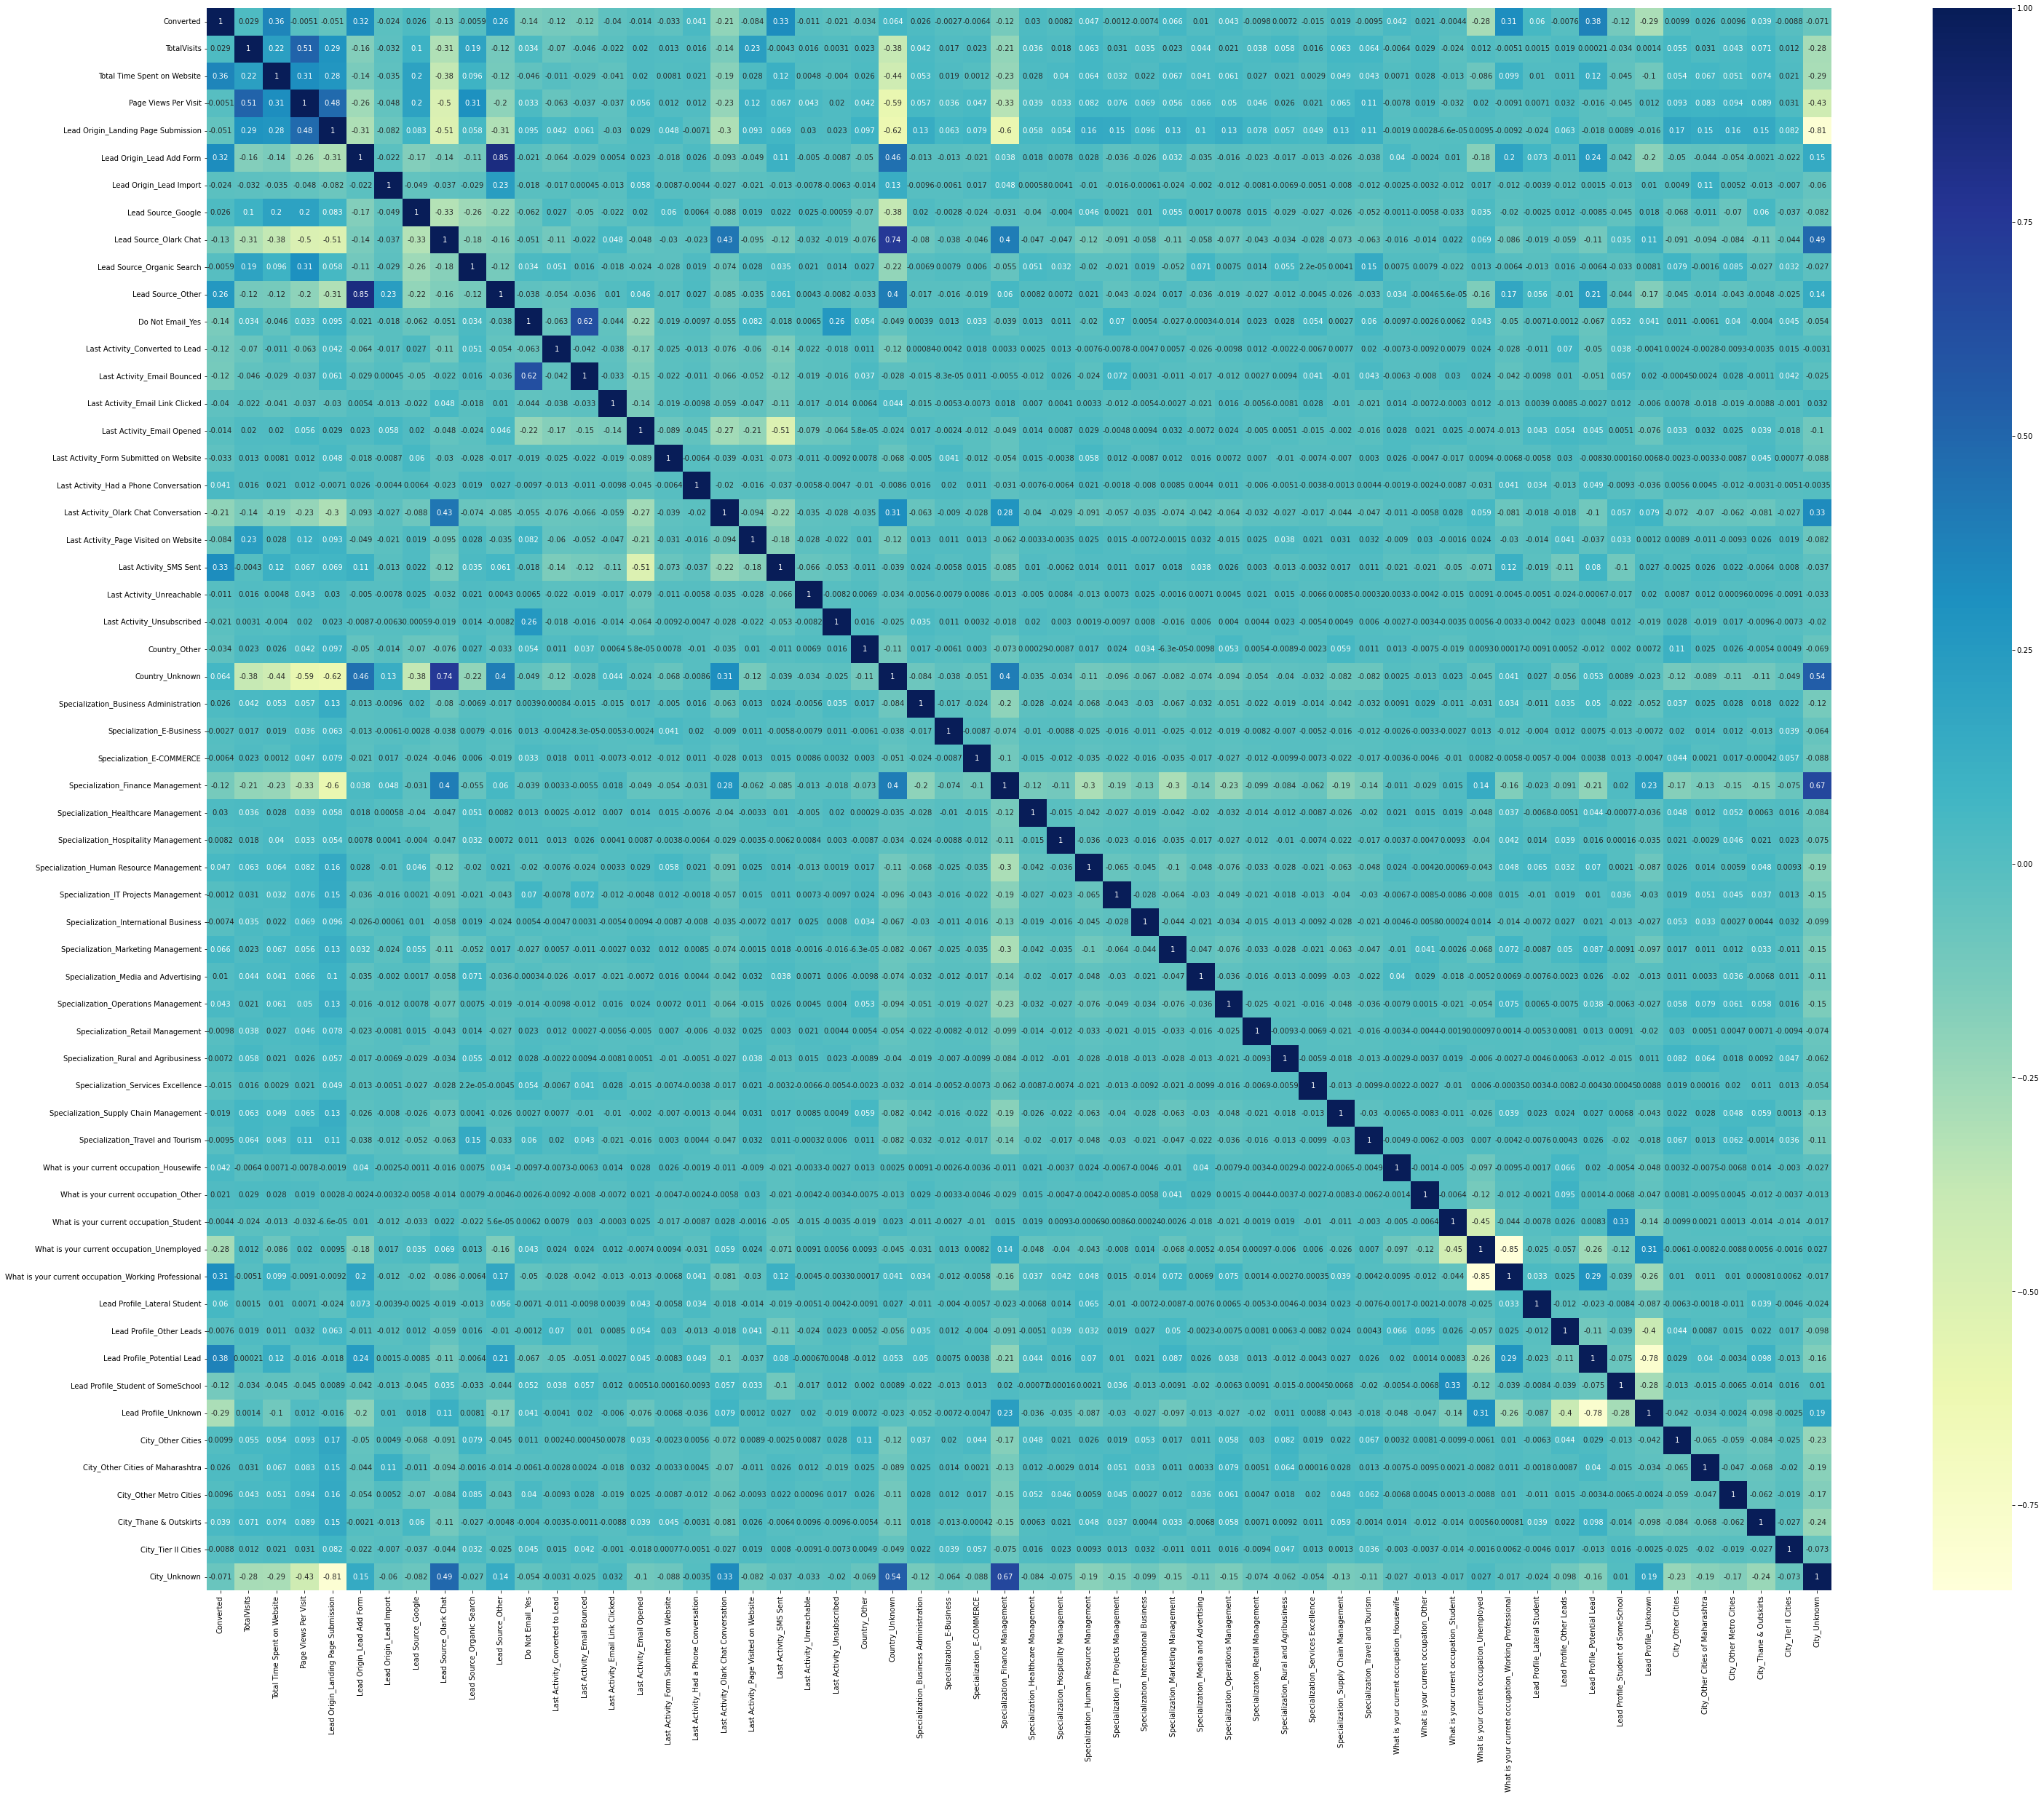

In [86]:
plt.figure(figsize=(50,40))
sns.heatmap(ldf.corr(),annot = True,cmap ="YlGnBu")
plt.show()

In [87]:
# few Highly correlated columns can be seen, lets have RFE handle them

# Training the model

In [88]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6410
Model Family:                Binomial   Df Model:                           57
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2499.0
Date:                Sun, 21 May 2023   Deviance:                       4997.9
Time:                        14:04:30   Pearson chi2:                 1.26e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4269
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   23.5545   1.71e+04      0.001      0.999   -3.35e+04    3.36e+04
TotalVisits                                              0.1876      0.053      3.516      0.000       0.083       0.292
Total Time Spent on Website                              1.0828      0.042     25.904      0.000       1.001       1.165
Page Views Per Visit                                    -0.1394      0.056     -2.504      0.012      -0.249      -0.030
Lead Origin_Landing Page Submission                     -0.4010      0.159     -2.519      0.012      -0.713      -0.089
Lead Origin_Lead Add Form                                2.7027      0.401      6.739      0.000       1.917       3.489
Lead Origin_Lead Import                                 -1.0926      0.663     -1.648      0.099      -2.392       0.207
Lead Source_Google                                       0.3237      0.101      3.210      0.001       0.126       0.521
Lead Source_Olark Chat                                   0.6014      0.283      2.123      0.034       0.046       1.157
Lead Source_Organic Search                               0.1474      0.133      1.106      0.269      -0.114       0.409
Lead Source_Other                                        0.1718      0.285      0.603      0.546      -0.386       0.730
Do Not Email_Yes                                        -0.9552      0.201     -4.754      0.000      -1.349      -0.561
Last Activity_Converted to Lead                         -2.3911      0.686     -3.487      0.000      -3.735      -1.047
Last Activity_Email Bounced                             -2.0778      0.737     -2.819      0.005      -3.522      -0.633
Last Activity_Email Link Clicked                        -1.6877      0.686     -2.461      0.014      -3.032      -0.344
Last Activity_Email Opened                              -1.2620      0.654     -1.930      0.054      -2.544       0.020
Last Activity_Form Submitted on Website                 -1.8002      0.730     -2.467      0.014      -3.231      -0.370
Last Activity_Had a Phone Conversation                   0.3765      0.940      0.401      0.689      -1.466       2.219
Last Activity_Olark Chat Conversation                   -2.9499      0.672     -4.391      0.000      -4.267      -1.633
Last Activity_Page Visited on Website                   -1.8104      0.669     -2.705      0.007      -3.122      -0.498
Last Activity_SMS Sent                                   0.0129      0.655      0.020      0.984      -1.270       1.296
Last Activity_Unreachable                               -1.0609      0.737     -1.440      0.150      -2.505       0.383
Last Activity_Unsubscribed                              -0

# Feature Selection using RFE

In [89]:
#Using RFE for selection
logreg=LogisticRegression()


In [90]:
# Running RFE with the output number of the variable equal to 20
rfe=RFE(logreg,n_features_to_select=20)    # running RFE
rfe=rfe.fit(X_train,y_train)


In [91]:
rfe.support_

array([False,  True, False, False,  True,  True, False,  True, False,
       False,  True,  True,  True, False, False, False,  True,  True,
       False,  True, False,  True, False,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
        True,  True,  True, False,  True,  True, False, False, False,
       False, False, False])

In [92]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 17),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 19),
 ('Lead Origin_Landing Page Submission', False, 7),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Google', False, 11),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 18),
 ('Lead Source_Other', False, 12),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 5),
 ('Last Activity_Email Opened', False, 27),
 ('Last Activity_Form Submitted on Website', False, 4),
 ('Last Activity_Had a Phone Conversation', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Page Visited on Website', False, 3),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', False, 16),
 ('Last Activity_Unsubscribed', True, 1),
 ('Country_Other', False, 25),
 ('Country_Unknown'

In [93]:
col= X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'Country_Unknown',
       'Specialization_Hospitality Management',
       'What is your current occupation_Housewife',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Lead Profile_Lateral Student', 'Lead Profile_Other Leads',
       'Lead Profile_Student of SomeSchool', 'Lead Profile_Unknown'],
      dtype='object')

In [94]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Other',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Country_Other', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Servi

# Building the Logistic Regression Model

In [95]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
results = logm2.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2539.5
Date:                Sun, 21 May 2023   Deviance:                       5079.0
Time:                        14:04:32   Pearson chi2:                 1.34e+04
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4196
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.9633      0.269      3.585      0.000       0.437       1.490
Total Time Spent on Website                              1.0935      0.041     26.503      0.000       1.013       1.174
Lead Origin_Lead Add Form                                3.0150      0.296     10.184      0.000       2.435       3.595
Lead Origin_Lead Import                                 -0.5247      0.573     -0.916      0.360      -1.647       0.598
Lead Source_Olark Chat                                   0.6955      0.246      2.827      0.005       0.213       1.178
Do Not Email_Yes                                        -1.0227      0.193     -5.301      0.000      -1.401      -0.645
Last Activity_Converted to Lead                         -1.0882      0.215     -5.065      0.000      -1.509      -0.667
Last Activity_Email Bounced                             -0.7479      0.341     -2.196      0.028      -1.416      -0.080
Last Activity_Had a Phone Conversation                   1.7869      0.672      2.658      0.008       0.469       3.104
Last Activity_Olark Chat Conversation                   -1.5838      0.174     -9.096      0.000      -1.925      -1.243
Last Activity_SMS Sent                                   1.3154      0.079     16.717      0.000       1.161       1.470
Last Activity_Unsubscribed                               0.8482      0.509      1.668      0.095      -0.148       1.845
Country_Unknown                                          0.6453      0.248      2.605      0.009       0.160       1.131
Specialization_Hospitality Management                   -0.7015      0.361     -1.946      0.052      -1.408       0.005
What is your current occupation_Housewife               20.6748   1.51e+04      0.001      0.999   -2.95e+04    2.96e+04
What is your current occupation_Unemployed              -0.9655      0.259     -3.721      0.000      -1.474      -0.457
What is your current occupation_Working Professional     1.5587      0.322      4.845      0.000       0.928       2.189
Lead Profile_Lateral Student                             1.1962      1.114      1.074      0.283      -0.987       3.379
Lead Profile_Other Leads                                -1.3491      0.175     -7.728      0.000      -1.691      -1.007
Lead Profile_Student of SomeSchool                      -4.3081      0.548     -7.864      0.000      -5.382      -3.234
Lead Profile_Unknown                                    -1.7173      0.100    -17.179      0.000      -1.913      -1.521
========================================================================================================================
"""

In [96]:
#VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Country_Unknown,13.85
3,Lead Source_Olark Chat,9.96
14,What is your current occupation_Unemployed,6.90
19,Lead Profile_Unknown,5.72
1,Lead Origin_Lead Add Form,4.72
4,Do Not Email_Yes,2.11
6,Last Activity_Email Bounced,1.90
9,Last Activity_SMS Sent,1.66
8,Last Activity_Olark Chat Conversation,1.47
15,What is your current occupation_Working Profes...,1.36


In [97]:
# Predicting values
y_train_pred = results.predict(X_train_sm)
y_train_pred[:10]

5261    0.122850
2901    0.050581
6969    0.005138
1256    0.073337
1554    0.013831
4747    0.032220
2735    0.121557
4652    0.403242
3364    0.050581
3946    0.442956
dtype: float64

In [98]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.12285017, 0.05058119, 0.00513762, 0.07333741, 0.01383088,
       0.03222   , 0.12155659, 0.40324198, 0.05058119, 0.44295583])

In [99]:
# Creating dataframe with actual converted data and predicted probabilites
y_train_pred_final = pd.DataFrame({'Converted':y_train.values,'Converted_prob': y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Lead Number
0,0,0.122850,5261
1,0,0.050581,2901
2,0,0.005138,6969
3,0,0.073337,1256
4,0,0.013831,1554


In [100]:
#  cut off = 0.5
y_train_pred_final['Converted_pred']=y_train_pred_final['Converted_prob'].apply(lambda x : 1 if x>0.5 else 0)
y_train_pred_final.head()


,Converted,Converted_prob,Lead Number,Converted_pred
0,0,0.122850,5261,0
1,0,0.050581,2901,0
2,0,0.005138,6969,0
3,0,0.073337,1256,0
4,0,0.013831,1554,0


In [101]:
y_train_pred_final['Converted_pred'].value_counts()

0    4343
1    2125
Name: Converted_pred, dtype: int64

In [102]:
#Confusion Matrix / Accuracy/ Sensitivity / Specitiy 

In [103]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Converted_pred)
print(confusion)

[[3596  406]
 [ 747 1719]]


In [104]:
# Lets check Accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.Converted_pred))

0.8217377860235003


In [105]:
# Function to define model making and testing
def modeltesting(string,x,y_train_pred_final):
    X_train_new=x
    X_train_new = X_train_new.drop([string], axis = 1)
    # now checking the model summary and vif again
    X_train_sm = sm.add_constant(X_train_new)
    #create model
    logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
    #fit the model
    results = logm2.fit()
    # check the params
    print(results.summary())
    vif = pd.DataFrame()
    vif['Features'] = X_train_new.columns
    vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)
    #checking accuracy
    y_train_pred = results.predict(X_train_sm).values.reshape(-1)
    print("====================================================================================")
    print(y_train_pred[:10])
    y_train_pred_final['Converted_prob'] = y_train_pred
    y_train_pred_final['Converted_pred']=y_train_pred_final['Converted_prob'].apply(lambda x : 1 if x>0.5 else 0)
    print("====================================================================================")
    print(y_train_pred_final.head())
    print("====================================================================================") 
    print(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.Converted_pred))
    return X_train_new

In [106]:
#Droping variables basis p-value and VIF

#- High p-value and high vif -> drop
#- High p-value and low vif -> remove first
#- Low p-value and high vif -> remove later stage
#- Low p-value and low-vif -> keep

In [107]:
X_train_new = modeltesting('What is your current occupation_Housewife',X_train[col],y_train_pred_final) 

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2540.7
Date:                Sun, 21 May 2023   Deviance:                       5081.4
Time:                        14:04:33   Pearson chi2:                 1.34e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4194
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [108]:
X_train_new = modeltesting('Country_Unknown',X_train_new,y_train_pred_final)   

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2544.1
Date:                Sun, 21 May 2023   Deviance:                       5088.2
Time:                        14:04:33   Pearson chi2:                 1.31e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4188
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [109]:
X_train_new = modeltesting('Lead Origin_Lead Import',X_train_new,y_train_pred_final) 

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2544.1
Date:                Sun, 21 May 2023   Deviance:                       5088.2
Time:                        14:04:33   Pearson chi2:                 1.31e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4188
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [110]:
X_train_new = modeltesting('What is your current occupation_Unemployed',X_train_new,y_train_pred_final) 

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2552.6
Date:                Sun, 21 May 2023   Deviance:                       5105.2
Time:                        14:04:33   Pearson chi2:                 1.33e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4173
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [111]:
X_train_new = modeltesting('Lead Profile_Lateral Student',X_train_new,y_train_pred_final) 

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2553.3
Date:                Sun, 21 May 2023   Deviance:                       5106.6
Time:                        14:04:33   Pearson chi2:                 1.34e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4172
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [112]:
X_train_new = modeltesting('Do Not Email_Yes',X_train_new,y_train_pred_final)  

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2568.7
Date:                Sun, 21 May 2023   Deviance:                       5137.3
Time:                        14:04:33   Pearson chi2:                 1.33e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4144
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [113]:
X_train_new = modeltesting('Last Activity_Unsubscribed',X_train_new,y_train_pred_final) 

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2568.7
Date:                Sun, 21 May 2023   Deviance:                       5137.5
Time:                        14:04:34   Pearson chi2:                 1.33e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4144
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [114]:
# since all Pvalue are below 0.02 and vif are also below 2, this can be considered as final model.

In [115]:
#Predicted      not_converted  converted
#ACtual         
#not_converted  3600           402
#converted      751           1715


In [116]:
#Accuracy rate is around 82% which is good. 
#However we will also need to calculate the other metrics as we cannot depend only on the accuracy metrics

In [117]:
# Finding the metrics like accuracy, sensitivity and specicity 
def metrices_(converted,predicted):
    cm1 = metrics.confusion_matrix(converted,predicted)
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    return accuracy,sensi,speci

In [118]:
acc,sensi,speci=metrices_(y_train_pred_final.Converted,y_train_pred_final.Converted_pred)

print('Accuracy: {}, Sensitivity {}, specitiy {}'.format(acc,sensi,speci))

Accuracy: 0.8197278911564626, Sensitivity 0.6954582319545823, specitiy 0.8963018490754623


In [119]:
# Finding the TP, TN, FP, FN
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negative

In [120]:
# Sensitivity
print(TP/ float(TP+FN))

0.6970802919708029


In [121]:
# Specificity
print(TN/ float(TN+FP))


0.8985507246376812


In [122]:
# Calculate false postive rate -
print(FP/ float(TN+FP))

0.10144927536231885


In [123]:
# positive predictive value 
print (TP / float(TP+FP))

0.8089411764705883


In [124]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8279990789776652


In [125]:
## PLOT THE ROC

In [126]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

In [127]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_pred, drop_intermediate = False )


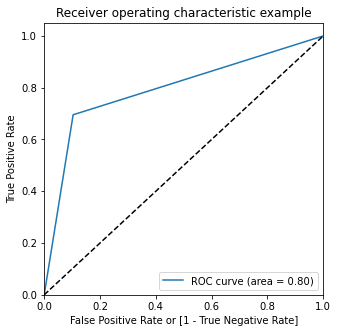

In [128]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_pred)


In [129]:
#Finding the optimal Point

In [130]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Lead Number,Converted_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.121896,5261,0,1,1,0,0,0,0,0,0,0,0
1,0,0.048603,2901,0,1,0,0,0,0,0,0,0,0,0
2,0,0.007412,6969,0,1,0,0,0,0,0,0,0,0,0
3,0,0.072832,1256,0,1,0,0,0,0,0,0,0,0,0
4,0,0.015731,1554,0,1,0,0,0,0,0,0,0,0,0


In [131]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.647495  0.969181  0.449275
0.2   0.2  0.768244  0.902271  0.685657
0.3   0.3  0.815863  0.854420  0.792104
0.4   0.4  0.827613  0.791160  0.850075
0.5   0.5  0.819728  0.695458  0.896302
0.6   0.6  0.814626  0.634631  0.925537
0.7   0.7  0.800866  0.557989  0.950525
0.8   0.8  0.770408  0.445255  0.970765
0.9   0.9  0.718460  0.281427  0.987756


<Figure size 1440x1080 with 0 Axes>

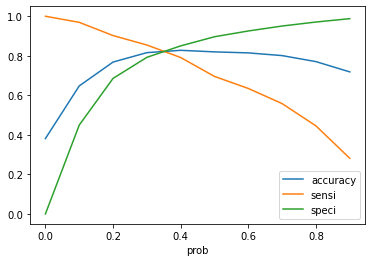

In [132]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize=(20,15))
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [133]:
# From the curve above, 0.32 is the optimum point to take it as a cutoff probability.

# Precision and Recall

In [134]:
#looking at confusion matrix again

In [135]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Converted_pred)
print(confusion)

[[3587  415]
 [ 751 1715]]


In [136]:
#precision TP/TP+FP
print (TP / float(TP+FP))

0.8089411764705883


In [137]:
#recall TP/TP+FN
print (TP / float(TP+FN))

0.6970802919708029


In [138]:
#Precision and recall Tradeoff

In [139]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)


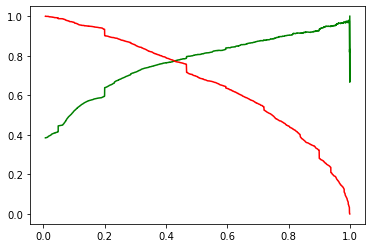

In [140]:
plt.plot(thresholds, p[:-1], "g-",label='Precision')
plt.plot(thresholds, r[:-1], "r-",label='Recall')
plt.show()

In [141]:
#Here we got 0.42 as the Cut-off as Precesion-Recall Threshold

# Making Prediction on test set

In [142]:
X_test[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']]=scaler.transform(X_test[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']])


In [143]:
#Adding constant
X_test_sm = sm.add_constant(X_test[col])
#Making prediction
y_test_pred = results.predict(X_test_sm)
y_test_pred[:10]

2140    0.949480
7707    1.000000
1522    1.000000
1873    1.000000
8100    1.000000
7332    0.999836
1094    0.063744
2397    1.000000
1103    1.000000
2257    1.000000
dtype: float64

In [144]:

# Converting y_pred to a dataframe which is an array
y_pred_test = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df['Lead Number'] = y_test_df.index

In [145]:
# Removing index for both dataframes to append them side by side 
y_pred_test.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [146]:
# Appending y_test_df and y_pred_test
y_pred_final = pd.concat([y_test_df, y_pred_test],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [147]:
y_pred_final.head()

,Converted,Lead Number,Converted_Prob
0,1,2140,0.94948
1,1,7707,1.00000
2,1,1522,1.00000
3,0,1873,1.00000
4,1,8100,1.00000


In [148]:
y_pred_final['final_test_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.32 else 0)

In [149]:
y_pred_final.head()

,Converted,Lead Number,Converted_Prob,final_test_predicted
0,1,2140,0.94948,1
1,1,7707,1.00000,1
2,1,1522,1.00000,1
3,0,1873,1.00000,1
4,1,8100,1.00000,1


In [150]:
acc,sensi,speci=metrices_(y_pred_final.Converted,y_pred_final.final_test_predicted)

In [151]:
print('Accuracy: {}, Sensitivity {}, specitiy {}  '.format(acc,sensi,speci))

Accuracy: 0.49314574314574317, Sensitivity 0.960730593607306, specitiy 0.18783542039355994  


In [152]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted,y_pred_final.final_test_predicted)
print(confusion2)

[[ 315 1362]
 [  43 1052]]


In [153]:
# Finding the TP, TN, FP, FN
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negative

In [154]:
# Sensitivity
print(TP/ float(TP+FN))

0.960730593607306


In [155]:
# Specificity
print(TN/ float(TN+FP))

0.18783542039355994


# Assigning Lead Score in the data frame with respect to Lead Number

In [156]:
y_pred_final.head()

,Converted,Lead Number,Converted_Prob,final_test_predicted
0,1,2140,0.94948,1
1,1,7707,1.00000,1
2,1,1522,1.00000,1
3,0,1873,1.00000,1
4,1,8100,1.00000,1


In [157]:
# making new df with lead score
lead_scorer_df=pd.DataFrame()
df1=y_train_pred_final[['Lead Number','Converted_prob']]
df2=y_pred_final[['Lead Number','Converted_Prob']]

In [158]:
lead_scorer_df=df1.append(df2,ignore_index=True)

In [159]:
# Assigning the value to the Lead Score by Multiplying 100
lead_scorer_df['Lead Score']=lead_scorer_df['Converted_prob'].apply(lambda x: round((x*100),2))

In [162]:
# dropping Converted_Prob
lead_scorer_df.drop('Converted_Prob',1,inplace=True)


In [163]:
#LEAD SCORE WRT LEAD NUMBER
lead_scorer_df.head()

,Lead Number,Lead Score
0,5261,12.19
1,2901,4.86
2,6969,0.74
3,1256,7.28
4,1554,1.57
